# ALFA - BD Audio Treatment Script in Python
Esse script foi confeccionado com o intuito de atender e resolver a [US #115](https://docs.google.com/spreadsheets/d/1sRARDZYaiFf5vIwv6KUR3BdWxgSHWBMjMwNxeBmX9SE/edit#gid=731461510) do [Projeto ALFA-BD](https://sites.google.com/view/projeto-alfa-bd/home). Sendo esta US:
**COMO Investidor DESEJO QUE Seja elaborado um meio de tratamento de áudio PARA ter a maior clareza possível na fala dos alunos**.

Para confecção deste script, foi utilizado a implementação desenvolvida por Tim Sainburg disponível neste [repositório](https://github.com/timsainb/noisereduce). Os exemplos 1 e 2 da sua utilização foram reproduções diretas do tutorial fornecido por Sainburg.

#Reference

* Tim Sainburg. **Software to Noise Reduction - noisereduce: v1.0**. Zenodo: 2019. Disponível em: https://github.com/timsainb/noisereduce

#### Download packages

In [ ]:
%load_ext autoreload
%autoreload 2

colab_requirements = [
    "pip install tensorflow-gpu==2.0.0-beta0 -q",
    "pip install librosa -q",
    "pip install noisereduce -q",
    "pip install soundfile -q",
    "pip install pydub -q"

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

os.chdir('/content/drive/MyDrive/Colab Notebooks/ITA/ALFA-BD')
os.getcwd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/content/drive/MyDrive/Colab Notebooks/ITA/ALFA-BD'

## Teste de redução de ruido com ruidos sintéticos - Tim Sainburg Tutorial

In [ ]:
#Library import

import os
import shutil
from os import path
from pydub import AudioSegment
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [ ]:
def plot_audio_data(data,rate):
  fig, ax = plt.subplots(figsize=(20,3))
  ax.plot(data)
  plt.title("Signal Audio")
  plt.xlabel("Time (ms)")
  plt.xlim([0, len(data)])
  plt.ylabel("")
  return IPython.display.Audio(data=data, rate=rate)

### Load data

In [ ]:
data, rate = sf.read('converted/fish.wav')
data = data

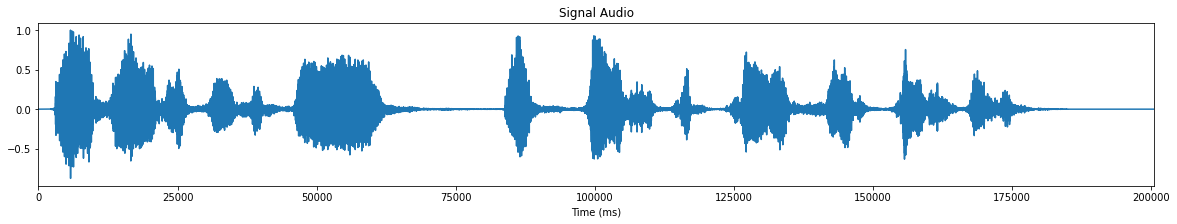

In [ ]:
plot_audio_data(data,rate)

## Criação sintética de ruído

In [ ]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]

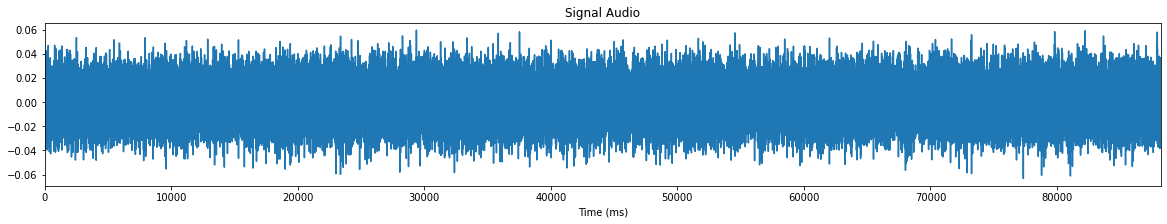

In [ ]:
plot_audio_data(noise_clip,rate)

### Implementação do ruído no áudio

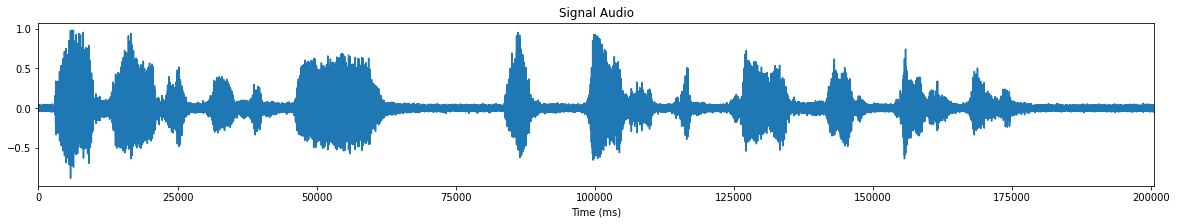

In [ ]:
audio_clip_band_limited = data+noise
plot_audio_data(audio_clip_band_limited,rate)

### Remoção do ruído

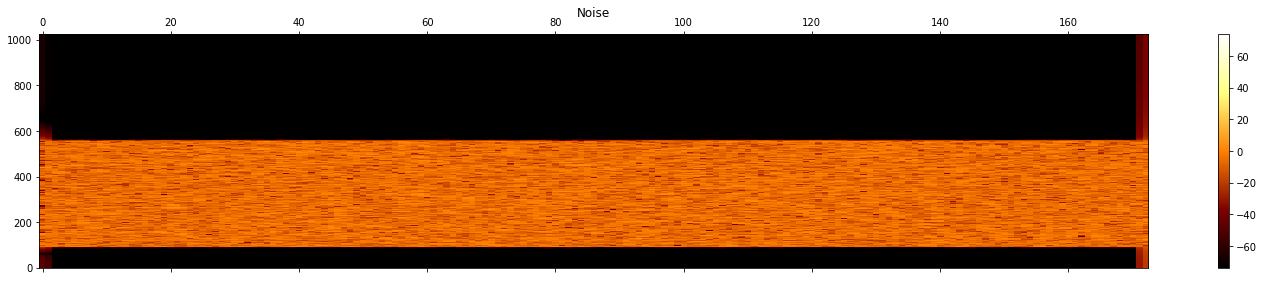

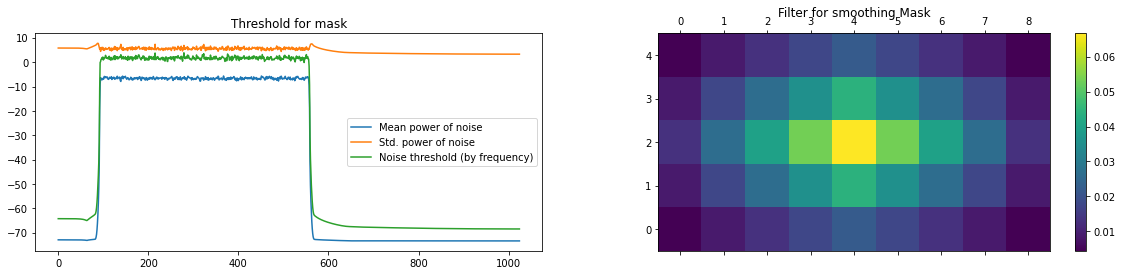

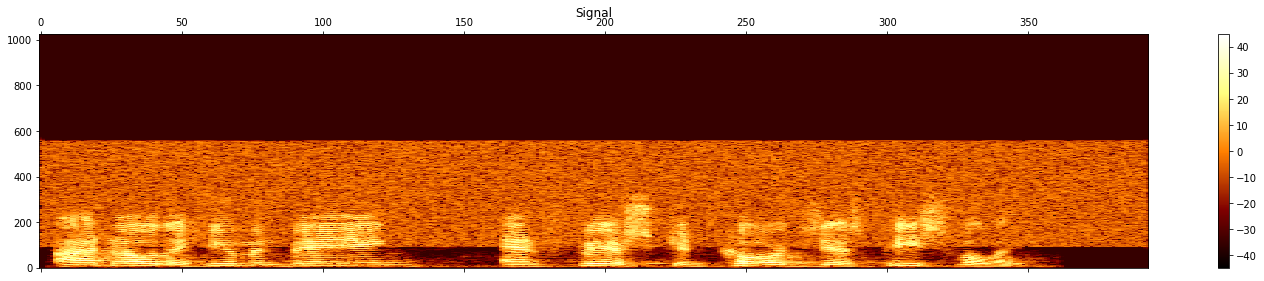

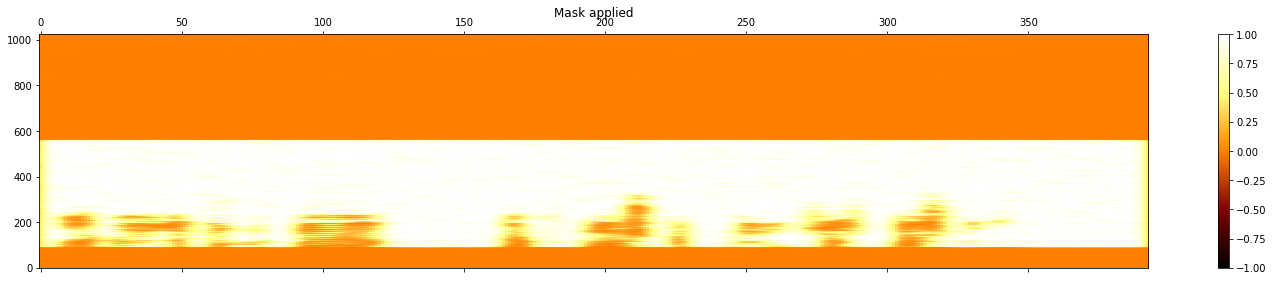

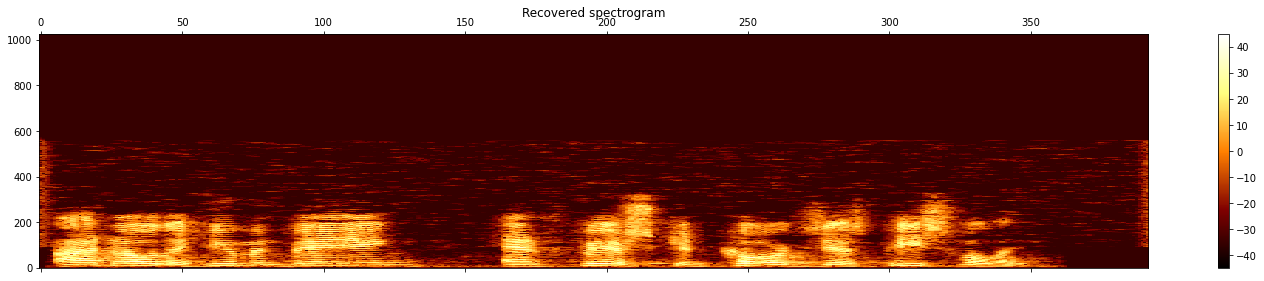

In [ ]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, prop_decrease=1.0, verbose=True)

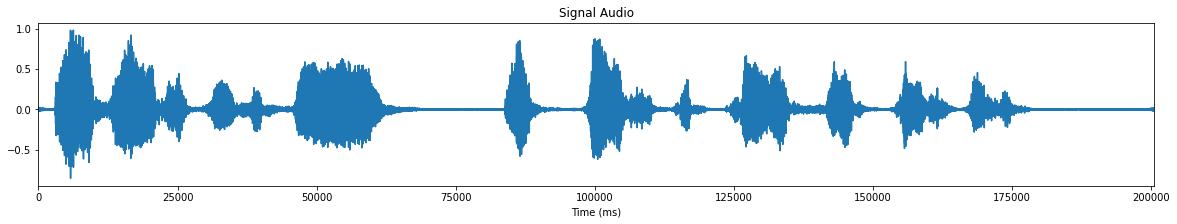

In [ ]:
plot_audio_data(noise_reduced,rate)

## Exemplo com ruído real

In [ ]:
noise_data, noise_rate = sf.read("raw/cafe_short.wav")

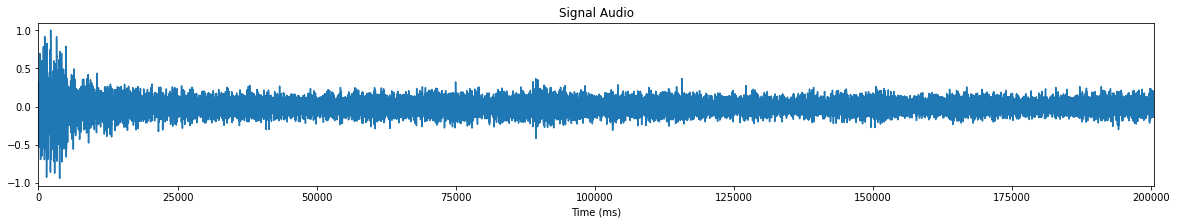

In [ ]:
plot_audio_data(noise_data,noise_rate)

### Implementação do ruído no áudio

In [ ]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

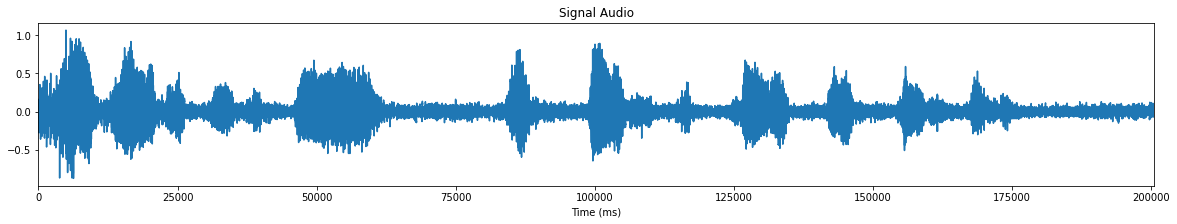

In [ ]:
plot_audio_data(audio_clip_cafe, rate)

### Remoção do ruído

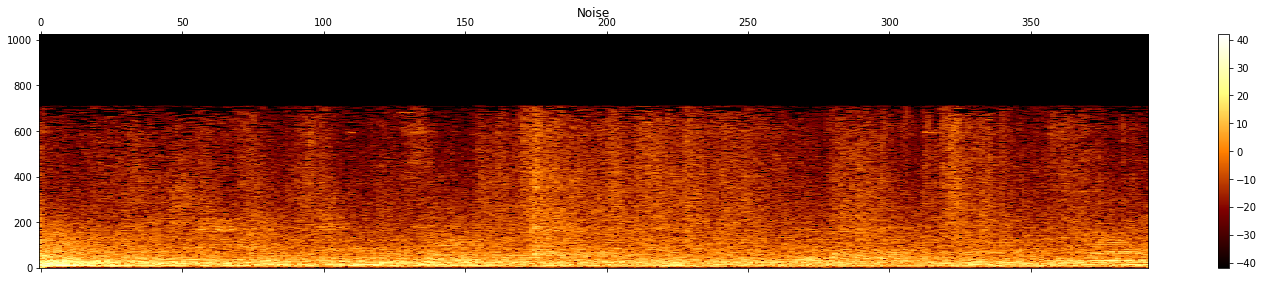

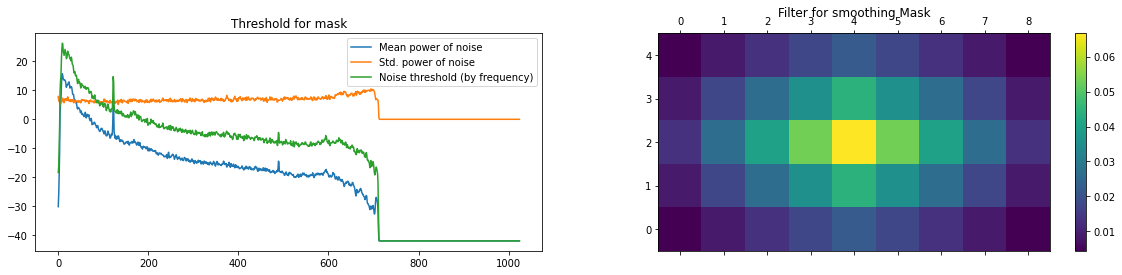

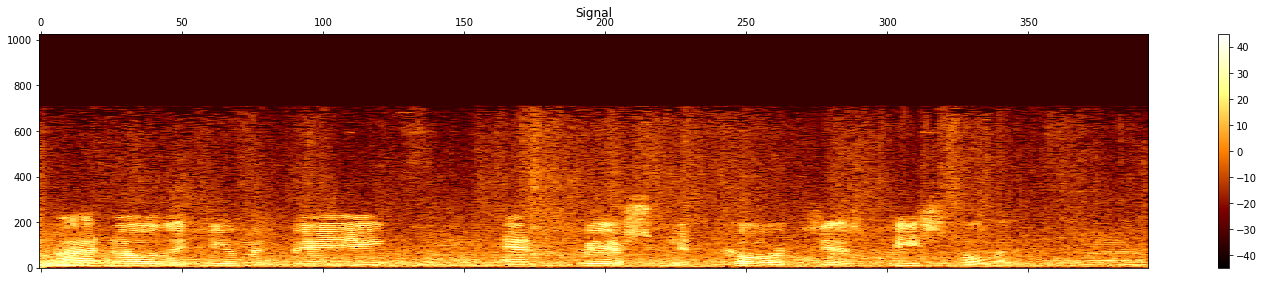

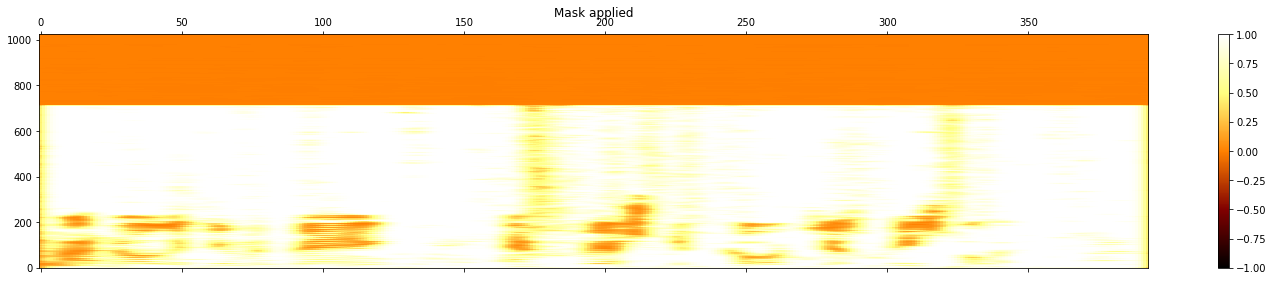

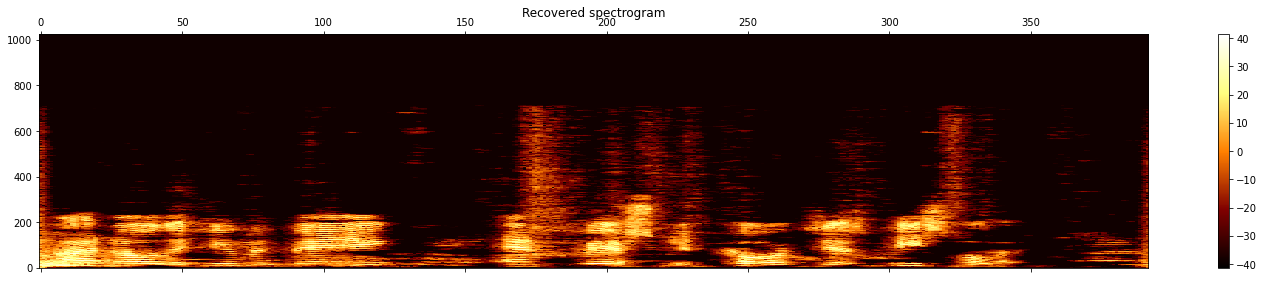

In [ ]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe, noise_clip=noise_clip, verbose=True)

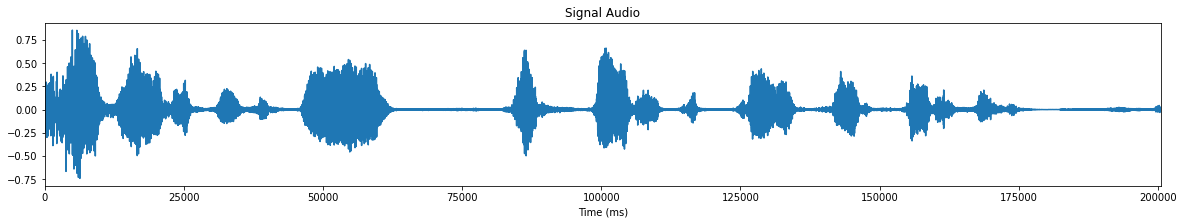

In [ ]:
plot_audio_data(noise_reduced, rate)

# Aplicação do método a uma função

### Format converter

Antes de realizar o tratamento apropriado do áudio, é necessário realizar uma converção do mesmo para o formato .wav

In [ ]:
for i in os.listdir("raw"):
  # files
  ext = i[i.index('.'):]
  name =  i[:i.index('.')]                                                                
  src = "raw/" + i
  dst = "converted/"
  if ext == ".wav":
    original = src
    target = dst + i
    shutil.copyfile(original, target)
  else:
    if ext == ".ogg":
      sound = AudioSegment.from_ogg(src)
    elif ext == ".mp3":
      sound = AudioSegment.from_mp3(src)
    dst = dst + name + "_" + ext[1:] +".wav"
    sound.export(dst, format="wav")

In [ ]:
def convert_wav(src):
  ext = src[src.index('.'):]
  name =  src[src.index('/') + 1:src.index('.')]
  dst = "converted/"
  if ext == ".wav":
    original = src
    dst = dst + name + ext
    shutil.copyfile(original, target)
  else:
    if ext == ".ogg":
      sound = AudioSegment.from_ogg(src)
    elif ext == ".mp3":
      sound = AudioSegment.from_mp3(src)
    dst = dst + name + "_" + ext[1:] +".wav"
    sound.export(dst, format="wav")

  src = dst
  return src

### Criação da função para utilização direta do método

In [ ]:
def alfa_bd_AT(src,dst):
  src = convert_wav(src)
  data, rate = sf.read(src)
  noise_clip = data/1.15
  noise_reduced = nr.reduce_noise(audio_clip=data, noise_clip=noise_clip,prop_decrease=1.0,  verbose=True)
  plt.figure(figsize=(20,11))
  plt.subplot(2,1,1)
  plt.plot(data)
  plt.title("Signal Audio - Com ruido")
  plt.xlim([0, len(data)])
  plt.subplot(2,1,2)
  plt.plot(noise_reduced)
  plt.title("Signal Audio - Sem ruido")
  plt.xlim([0, len(noise_reduced)])
  plt.xlabel("Time (ms)")
  wavfile.write(dst,rate,noise_reduced)
  raw = IPython.display.Audio(data=data, rate=rate)
  fix = IPython.display.Audio(data=noise_reduced, rate=rate)
  return raw, fix


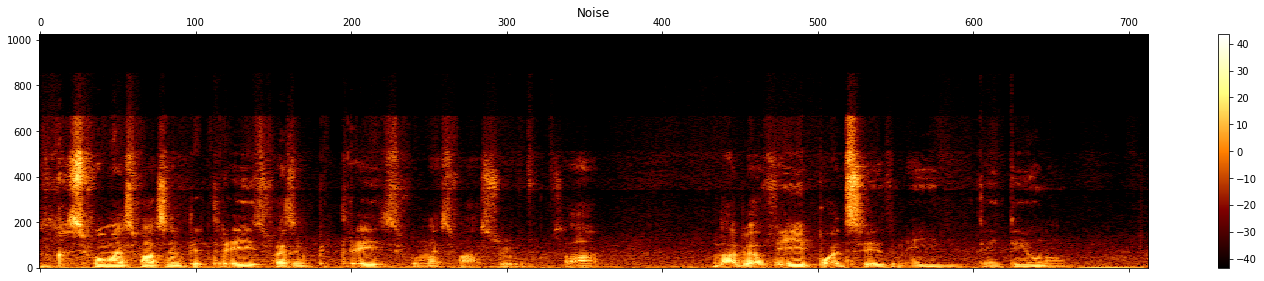

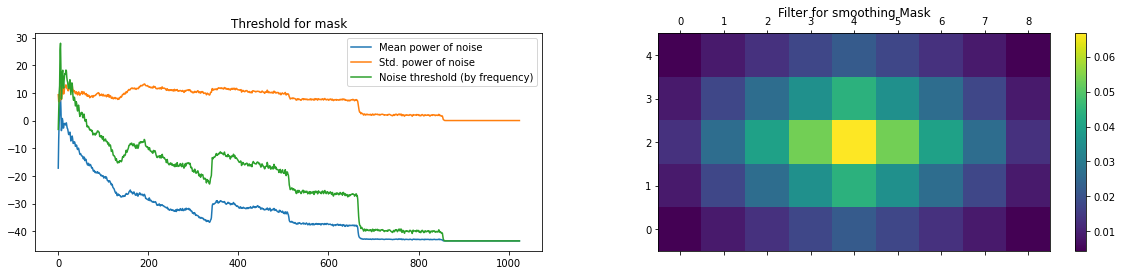

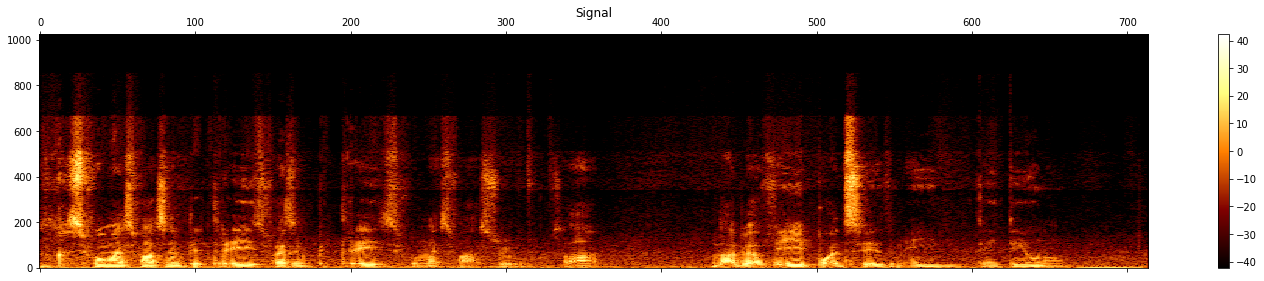

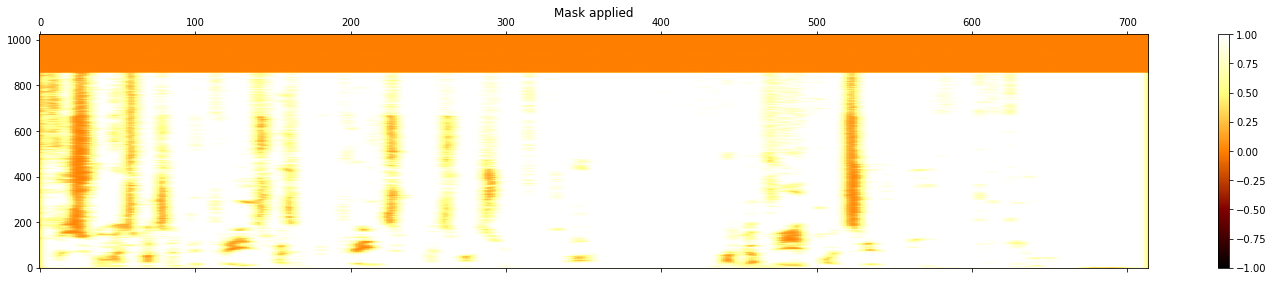

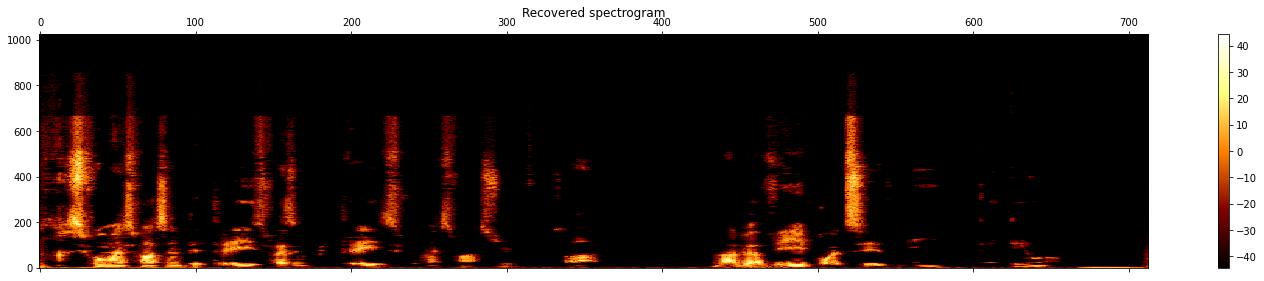

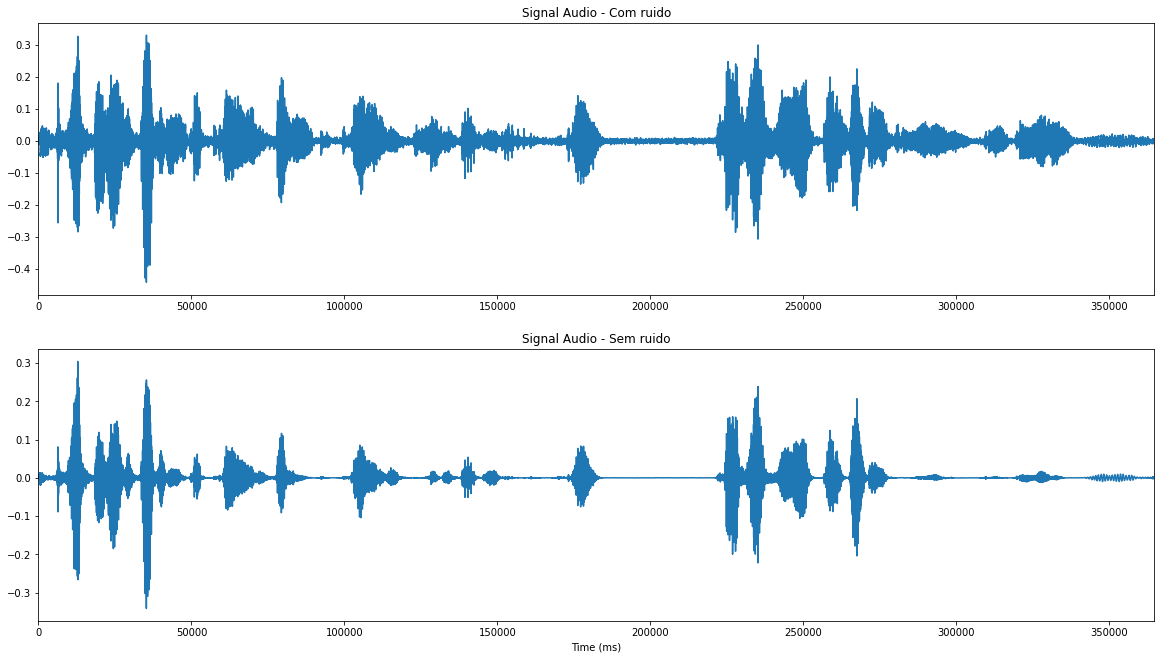

In [ ]:
raw, fix = alfa_bd_AT("raw/gabriel2.ogg","treated/gabriel2.mp3")

In [ ]:
raw

In [ ]:
fix